In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
import numpy as np
from Plotter import *
from FFNN import FFNN

In [5]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(np.int32)

np.random.seed(42)
indices = np.random.choice(len(X), 20000, replace=False)
X = X[indices]
y = y[indices]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y_one_hot = np.zeros((len(y), 10))
y_one_hot[np.arange(len(y)), y] = 1

X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

plotter = Plotter()

In [6]:
ffnn1 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    init_type="uniform",
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    seed=69420
)
ffnn1.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn1.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|██████████████████████████████████████| 438/438 [00:07<00:00, 57.34it/s, loss=28.7]


Train Loss: 28.6785 - Val Loss: 19.6001


Epoch 2/20: 100%|██████████████████████████████████████| 438/438 [00:04<00:00, 95.53it/s, loss=14.8]


Train Loss: 14.8424 - Val Loss: 11.3941


Epoch 3/20: 100%|██████████████████████████████████████| 438/438 [00:04<00:00, 94.66it/s, loss=9.51]


Train Loss: 9.5101 - Val Loss: 8.0541


Epoch 4/20: 100%|██████████████████████████████████████| 438/438 [00:04<00:00, 87.94it/s, loss=6.94]


Train Loss: 6.9411 - Val Loss: 5.9866


Epoch 5/20: 100%|██████████████████████████████████████| 438/438 [00:05<00:00, 77.46it/s, loss=5.21]


Train Loss: 5.2097 - Val Loss: 4.5189


Epoch 6/20: 100%|█████████████████████████████████████| 438/438 [00:03<00:00, 135.87it/s, loss=3.96]


Train Loss: 3.9582 - Val Loss: 3.4621


Epoch 7/20: 100%|███████████████████████████████████████| 438/438 [00:06<00:00, 72.26it/s, loss=2.7]


Train Loss: 2.7035 - Val Loss: 2.1142


Epoch 8/20: 100%|██████████████████████████████████████| 438/438 [00:05<00:00, 74.71it/s, loss=1.76]


Train Loss: 1.7637 - Val Loss: 1.4818


Epoch 9/20: 100%|██████████████████████████████████████| 438/438 [00:05<00:00, 84.95it/s, loss=1.18]


Train Loss: 1.1837 - Val Loss: 0.9558


Epoch 10/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 71.73it/s, loss=0.737]


Train Loss: 0.7367 - Val Loss: 0.5671


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 148.79it/s, loss=0.427]


Train Loss: 0.4267 - Val Loss: 0.3204


Epoch 12/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 102.17it/s, loss=0.24]


Train Loss: 0.2397 - Val Loss: 0.1813


Epoch 13/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 85.57it/s, loss=0.143]


Train Loss: 0.1433 - Val Loss: 0.1144


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 94.49it/s, loss=0.0982]


Train Loss: 0.0982 - Val Loss: 0.0845


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 85.84it/s, loss=0.0773]


Train Loss: 0.0773 - Val Loss: 0.0705


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 88.47it/s, loss=0.0674]


Train Loss: 0.0674 - Val Loss: 0.0638


Epoch 17/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 100.73it/s, loss=0.0624]


Train Loss: 0.0624 - Val Loss: 0.0604


Epoch 18/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 174.99it/s, loss=0.0597]


Train Loss: 0.0597 - Val Loss: 0.0584


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 87.91it/s, loss=0.0581]


Train Loss: 0.0581 - Val Loss: 0.0571


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 90.23it/s, loss=0.0571]


Train Loss: 0.0571 - Val Loss: 0.0563
Akurasi: 93.53%


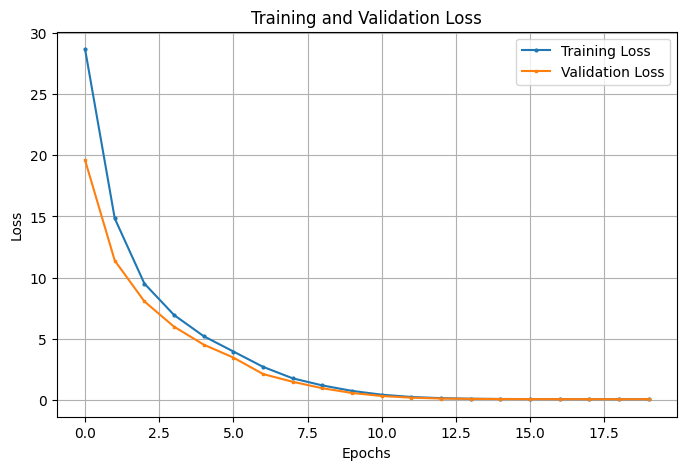

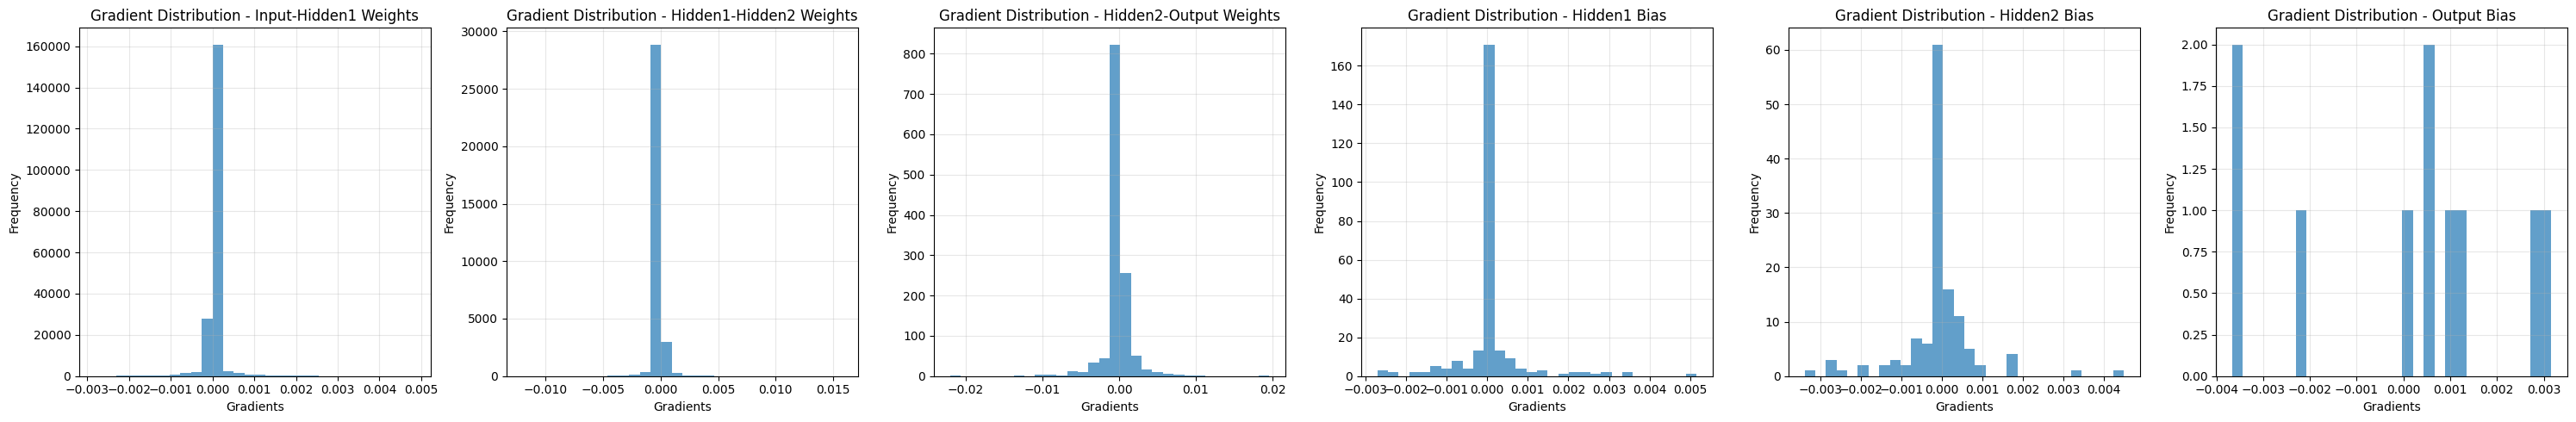

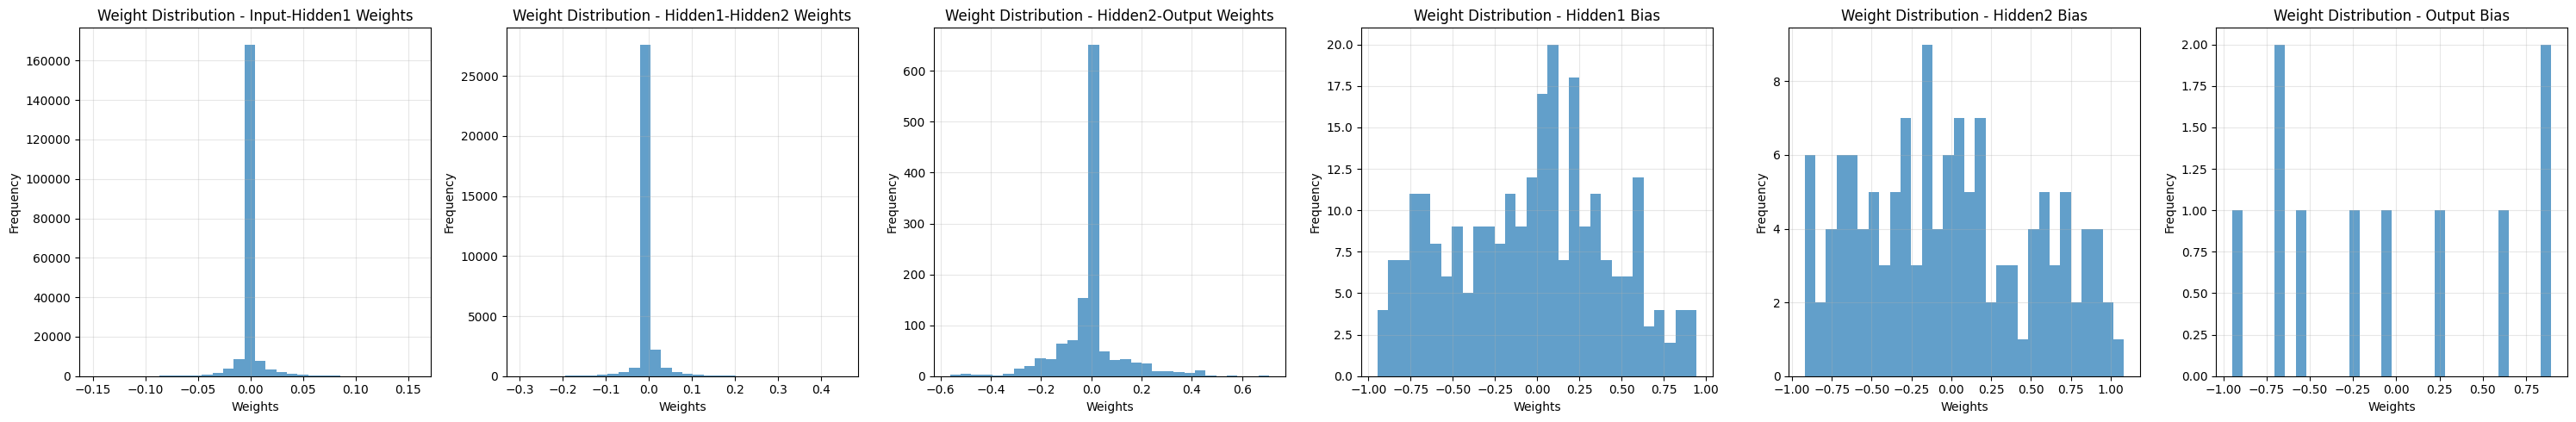

In [7]:
plotter.plot_training_history(ffnn1)
plotter.plot_gradient_distributions(ffnn1)
plotter.plot_weight_distributions(ffnn1)

In [8]:
ffnn2 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    init_type="normal",
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    seed=69420
)
ffnn2.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn2.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|█████████████████████████████████████| 438/438 [00:03<00:00, 114.93it/s, loss=92.4]


Train Loss: 92.4161 - Val Loss: 70.4185


Epoch 2/20: 100%|███████████████████████████████████████| 438/438 [00:03<00:00, 127.54it/s, loss=55]


Train Loss: 55.0001 - Val Loss: 41.6184


Epoch 3/20: 100%|█████████████████████████████████████| 438/438 [00:03<00:00, 112.01it/s, loss=32.3]


Train Loss: 32.3066 - Val Loss: 24.3079


Epoch 4/20: 100%|█████████████████████████████████████| 438/438 [00:04<00:00, 103.37it/s, loss=19.5]


Train Loss: 19.4585 - Val Loss: 15.5784


Epoch 5/20: 100%|███████████████████████████████████████| 438/438 [00:01<00:00, 229.33it/s, loss=13]


Train Loss: 13.0251 - Val Loss: 10.6841


Epoch 6/20: 100%|██████████████████████████████████████| 438/438 [00:03<00:00, 126.81it/s, loss=9.1]


Train Loss: 9.1043 - Val Loss: 7.7575


Epoch 7/20: 100%|█████████████████████████████████████| 438/438 [00:03<00:00, 131.99it/s, loss=6.74]


Train Loss: 6.7375 - Val Loss: 5.8699


Epoch 8/20: 100%|█████████████████████████████████████| 438/438 [00:03<00:00, 132.36it/s, loss=5.36]


Train Loss: 5.3594 - Val Loss: 4.8731


Epoch 9/20: 100%|█████████████████████████████████████| 438/438 [00:03<00:00, 128.27it/s, loss=4.47]


Train Loss: 4.4656 - Val Loss: 4.0433


Epoch 10/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 123.40it/s, loss=3.79]


Train Loss: 3.7859 - Val Loss: 3.5562


Epoch 11/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 128.10it/s, loss=3.34]


Train Loss: 3.3439 - Val Loss: 3.1738


Epoch 12/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 125.03it/s, loss=3.01]


Train Loss: 3.0131 - Val Loss: 2.8362


Epoch 13/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 128.27it/s, loss=2.74]


Train Loss: 2.7442 - Val Loss: 2.5302


Epoch 14/20: 100%|████████████████████████████████████| 438/438 [00:01<00:00, 251.16it/s, loss=1.05]


Train Loss: 1.0472 - Val Loss: 0.9441


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 100.86it/s, loss=0.795]


Train Loss: 0.7950 - Val Loss: 0.7536


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 103.22it/s, loss=0.642]


Train Loss: 0.6417 - Val Loss: 0.5987


Epoch 17/20: 100%|█████████████████████████████████████| 438/438 [00:04<00:00, 96.03it/s, loss=0.52]


Train Loss: 0.5199 - Val Loss: 0.4884


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 108.58it/s, loss=0.422]


Train Loss: 0.4221 - Val Loss: 0.3900


Epoch 19/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 98.41it/s, loss=0.341]


Train Loss: 0.3412 - Val Loss: 0.3170


Epoch 20/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 93.01it/s, loss=0.276]


Train Loss: 0.2760 - Val Loss: 0.2559
Akurasi: 90.20%


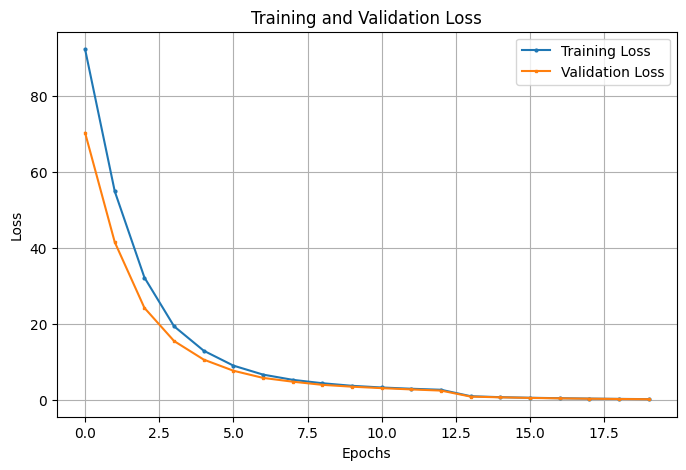

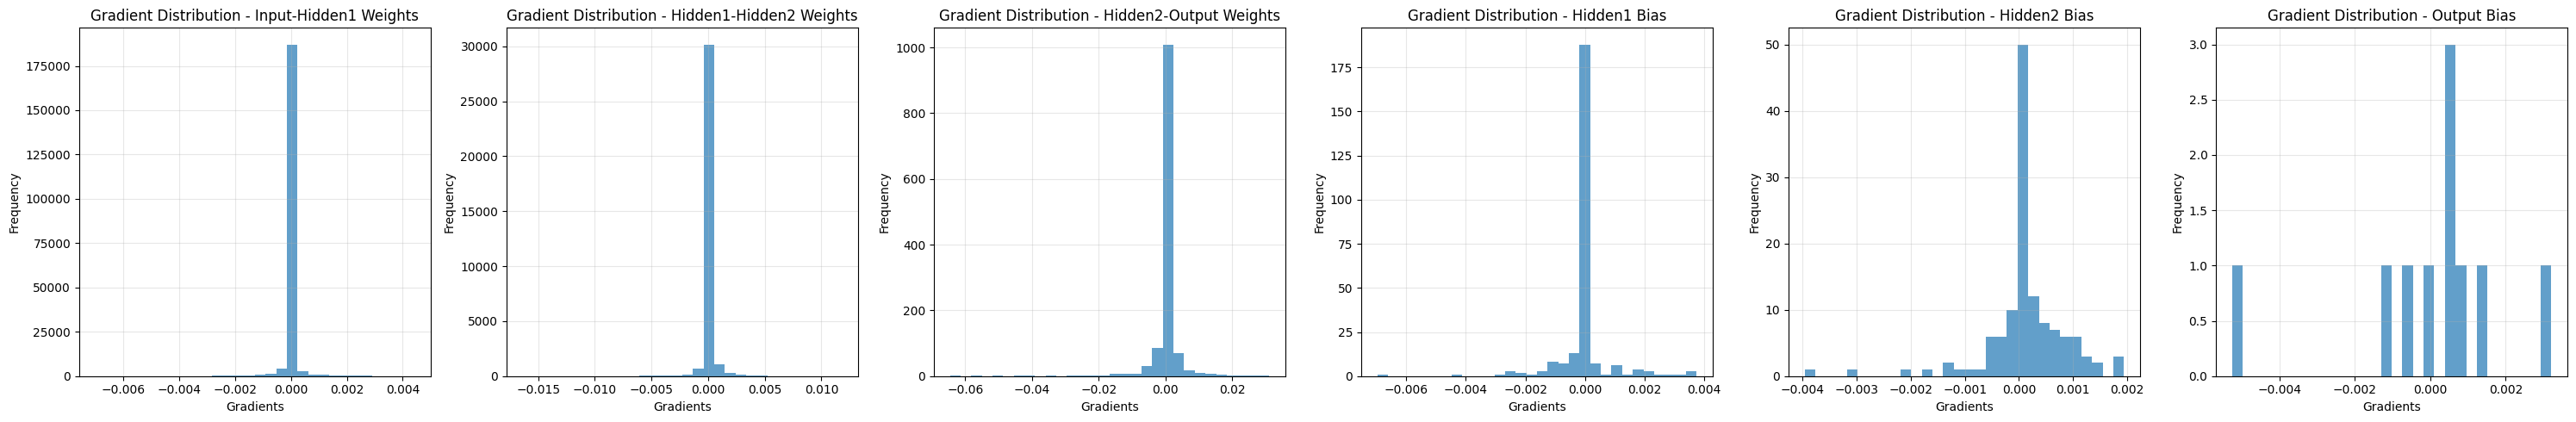

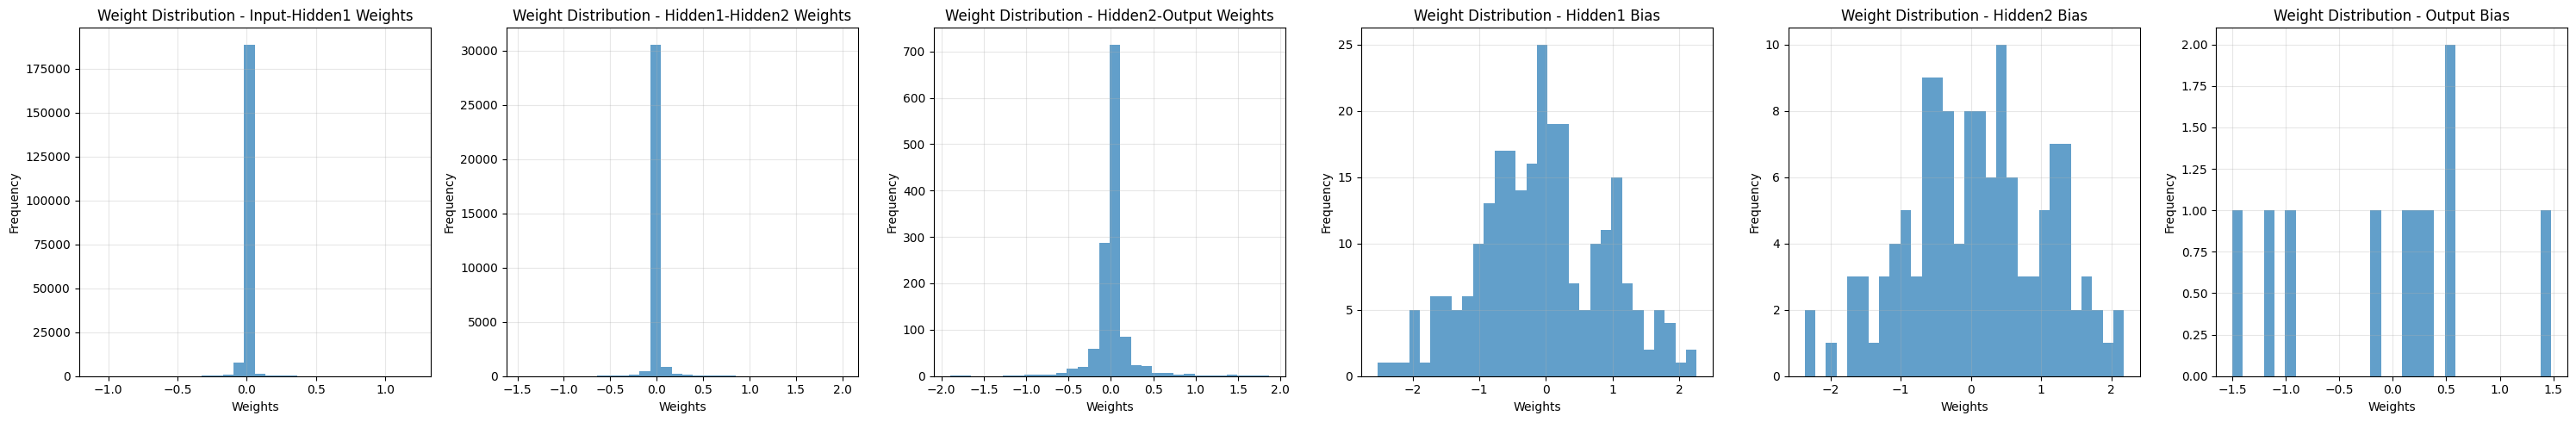

In [9]:
plotter.plot_training_history(ffnn2)
plotter.plot_gradient_distributions(ffnn2)
plotter.plot_weight_distributions(ffnn2)

In [10]:
ffnn3 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    init_type="xavier",
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    seed=69420
)
ffnn3.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn3.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|█████████████████████████████████████| 438/438 [00:03<00:00, 129.87it/s, loss=0.15]


Train Loss: 0.1504 - Val Loss: 0.0796


Epoch 2/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 125.05it/s, loss=0.0707]


Train Loss: 0.0707 - Val Loss: 0.0625


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 131.79it/s, loss=0.062]


Train Loss: 0.0620 - Val Loss: 0.0587


Epoch 4/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 119.56it/s, loss=0.0595]


Train Loss: 0.0595 - Val Loss: 0.0573


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 83.14it/s, loss=0.0582]


Train Loss: 0.0582 - Val Loss: 0.0563


Epoch 6/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 85.17it/s, loss=0.0574]


Train Loss: 0.0574 - Val Loss: 0.0556


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 82.61it/s, loss=0.0567]


Train Loss: 0.0567 - Val Loss: 0.0552


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 218.87it/s, loss=0.0561]


Train Loss: 0.0561 - Val Loss: 0.0548


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 95.99it/s, loss=0.0556]


Train Loss: 0.0556 - Val Loss: 0.0544


Epoch 10/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 66.71it/s, loss=0.0552]


Train Loss: 0.0552 - Val Loss: 0.0541


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 85.63it/s, loss=0.0549]


Train Loss: 0.0549 - Val Loss: 0.0540


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 72.88it/s, loss=0.0546]


Train Loss: 0.0546 - Val Loss: 0.0537


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 80.81it/s, loss=0.0543]


Train Loss: 0.0543 - Val Loss: 0.0535


Epoch 14/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 151.77it/s, loss=0.0541]


Train Loss: 0.0541 - Val Loss: 0.0534


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 68.21it/s, loss=0.0539]


Train Loss: 0.0539 - Val Loss: 0.0533


Epoch 16/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 100.95it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0532


Epoch 17/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 91.94it/s, loss=0.0536]


Train Loss: 0.0536 - Val Loss: 0.0530


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 92.73it/s, loss=0.0535]


Train Loss: 0.0535 - Val Loss: 0.0531


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 80.92it/s, loss=0.0534]


Train Loss: 0.0534 - Val Loss: 0.0530


Epoch 20/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 178.55it/s, loss=0.0533]


Train Loss: 0.0533 - Val Loss: 0.0529
Akurasi: 94.00%


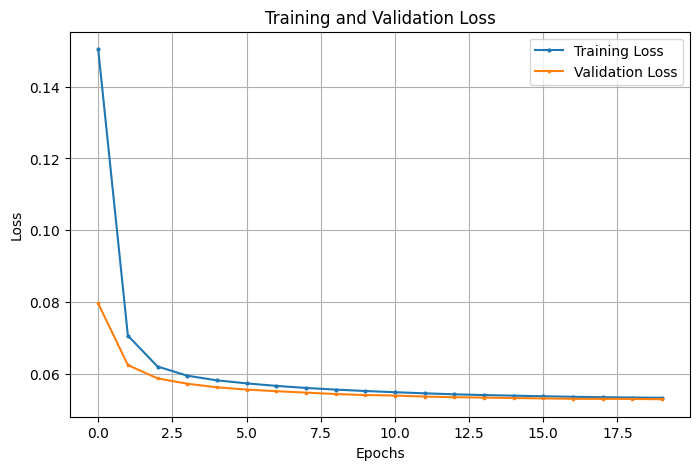

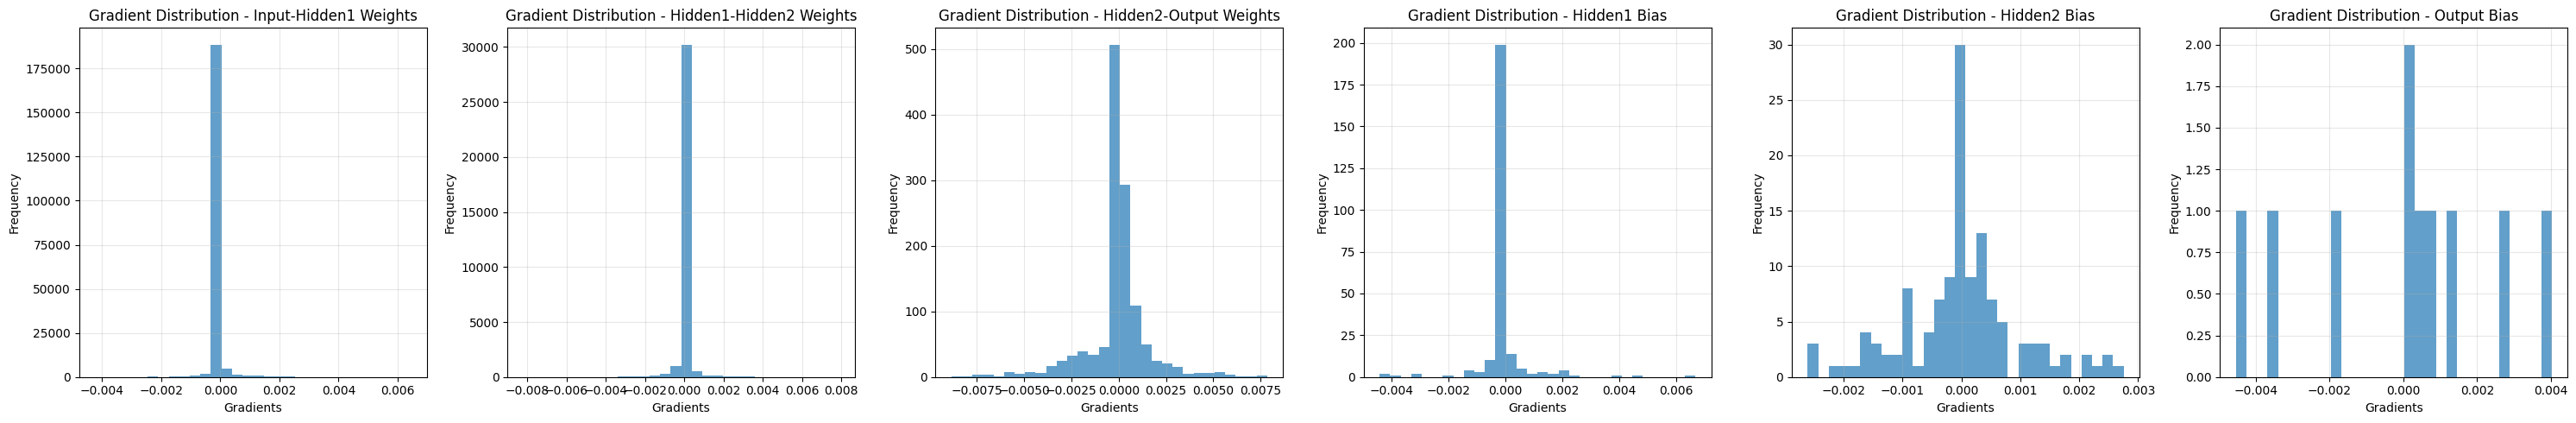

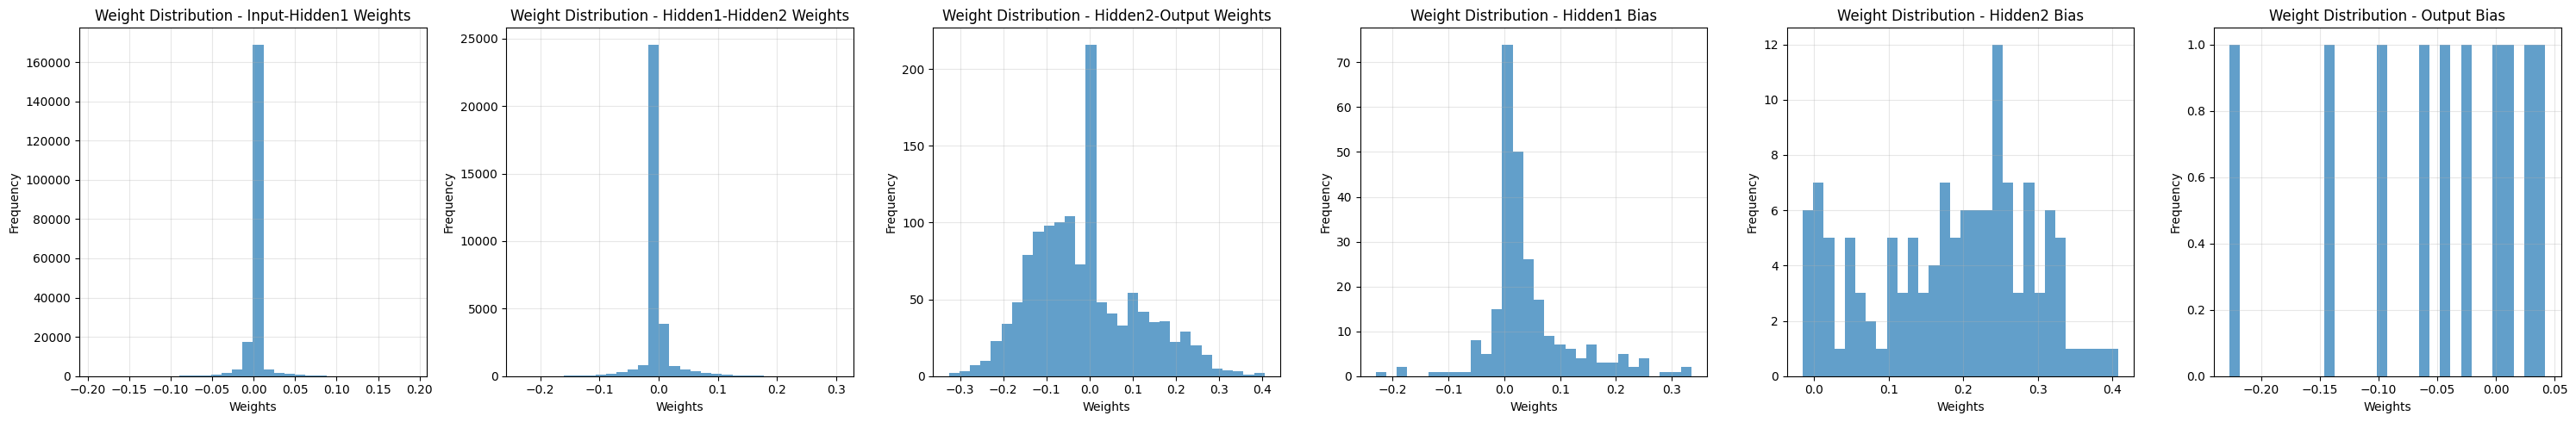

In [11]:
plotter.plot_training_history(ffnn3)
plotter.plot_gradient_distributions(ffnn3)
plotter.plot_weight_distributions(ffnn3)

In [12]:
ffnn4 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    init_type="he",
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    seed=69420
)
ffnn4.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn4.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 103.62it/s, loss=0.182]


Train Loss: 0.1819 - Val Loss: 0.0868


Epoch 2/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 96.01it/s, loss=0.0739]


Train Loss: 0.0739 - Val Loss: 0.0640


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 96.62it/s, loss=0.0628]


Train Loss: 0.0628 - Val Loss: 0.0593


Epoch 4/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 77.22it/s, loss=0.0598]


Train Loss: 0.0598 - Val Loss: 0.0576


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 83.96it/s, loss=0.0584]


Train Loss: 0.0584 - Val Loss: 0.0566


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 193.64it/s, loss=0.0575]


Train Loss: 0.0575 - Val Loss: 0.0558


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 66.63it/s, loss=0.0568]


Train Loss: 0.0568 - Val Loss: 0.0555


Epoch 8/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 80.83it/s, loss=0.0562]


Train Loss: 0.0562 - Val Loss: 0.0551


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 89.52it/s, loss=0.0557]


Train Loss: 0.0557 - Val Loss: 0.0548


Epoch 10/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 96.55it/s, loss=0.0553]


Train Loss: 0.0553 - Val Loss: 0.0545


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 112.26it/s, loss=0.055]


Train Loss: 0.0550 - Val Loss: 0.0544


Epoch 12/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 104.66it/s, loss=0.0547]


Train Loss: 0.0547 - Val Loss: 0.0541


Epoch 13/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 166.71it/s, loss=0.0544]


Train Loss: 0.0544 - Val Loss: 0.0538


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 92.65it/s, loss=0.0542]


Train Loss: 0.0542 - Val Loss: 0.0536


Epoch 15/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 82.75it/s, loss=0.054]


Train Loss: 0.0540 - Val Loss: 0.0535


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 73.10it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0534


Epoch 17/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 95.98it/s, loss=0.0537]


Train Loss: 0.0537 - Val Loss: 0.0534


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 71.96it/s, loss=0.0536]


Train Loss: 0.0536 - Val Loss: 0.0533


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 91.50it/s, loss=0.0535]


Train Loss: 0.0535 - Val Loss: 0.0533


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 78.47it/s, loss=0.0534]


Train Loss: 0.0534 - Val Loss: 0.0533
Akurasi: 93.87%


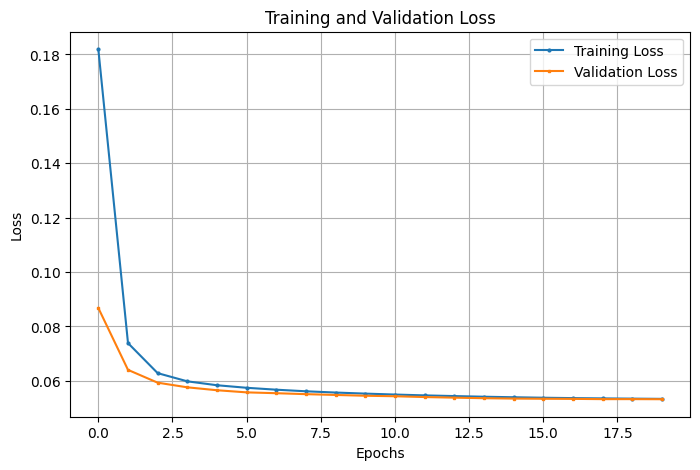

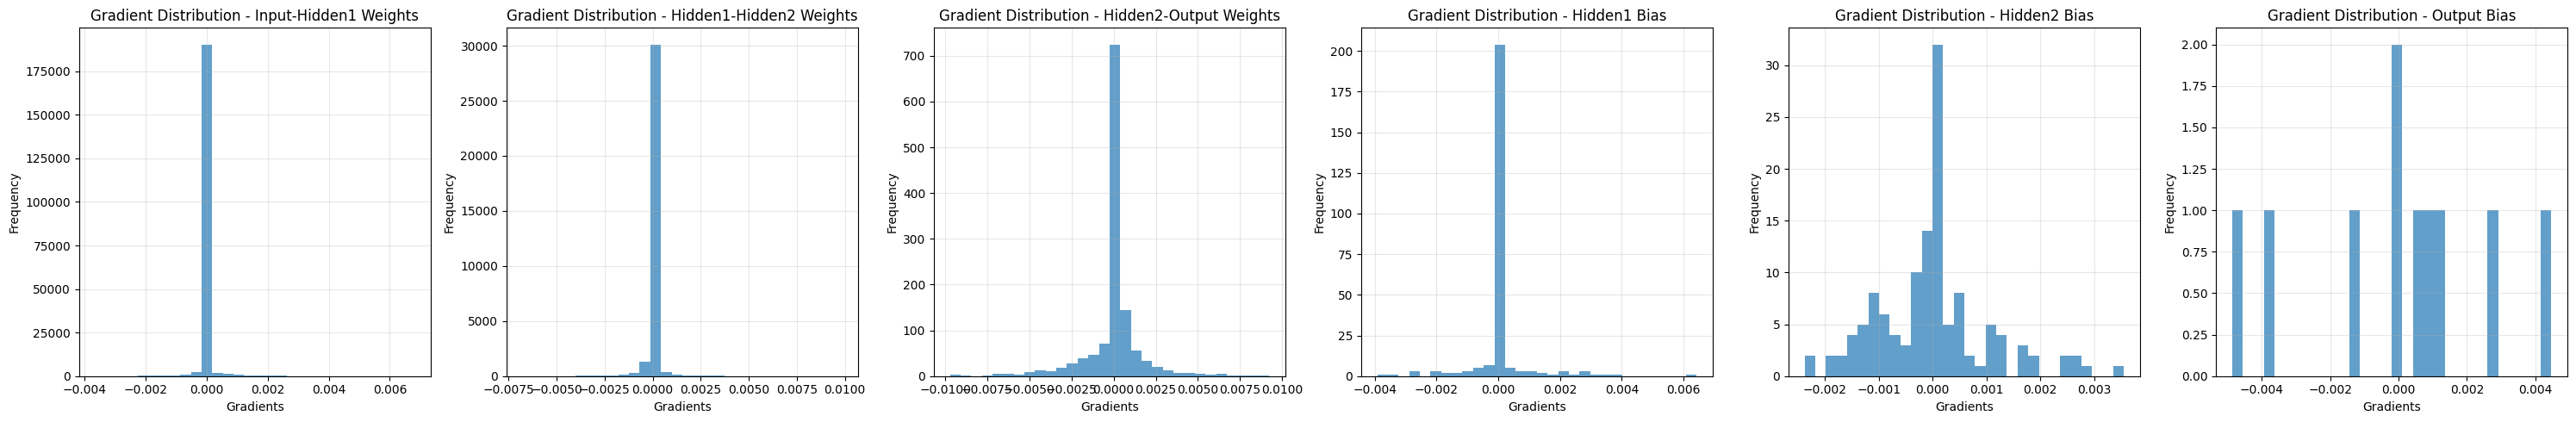

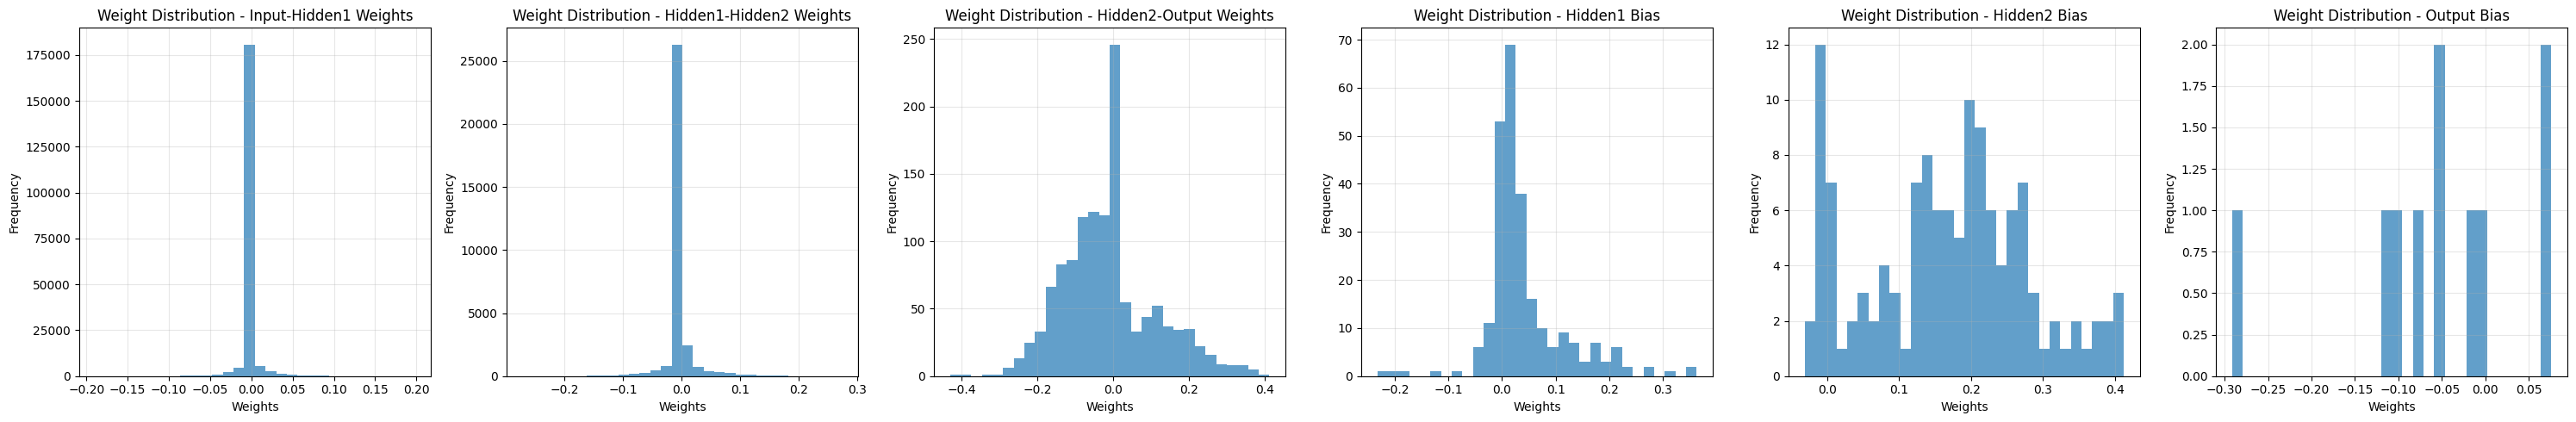

In [13]:
plotter.plot_training_history(ffnn4)
plotter.plot_gradient_distributions(ffnn4)
plotter.plot_weight_distributions(ffnn4)

In [14]:
ffnn5 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    # init_type="uniform",
    zero_init=True,
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    seed=69420
)
ffnn5.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn5.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|██████████████████████████████████████| 438/438 [00:04<00:00, 97.44it/s, loss=0.23]


Train Loss: 0.2302 - Val Loss: 0.2301


Epoch 2/20: 100%|██████████████████████████████████████| 438/438 [00:04<00:00, 98.18it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 3/20: 100%|██████████████████████████████████████| 438/438 [00:06<00:00, 70.06it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 4/20: 100%|█████████████████████████████████████| 438/438 [00:02<00:00, 207.11it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 5/20: 100%|██████████████████████████████████████| 438/438 [00:04<00:00, 90.00it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 6/20: 100%|██████████████████████████████████████| 438/438 [00:06<00:00, 63.48it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 7/20: 100%|██████████████████████████████████████| 438/438 [00:09<00:00, 46.39it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 8/20: 100%|██████████████████████████████████████| 438/438 [00:07<00:00, 57.71it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 9/20: 100%|██████████████████████████████████████| 438/438 [00:06<00:00, 63.29it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 10/20: 100%|█████████████████████████████████████| 438/438 [00:07<00:00, 59.68it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 11/20: 100%|█████████████████████████████████████| 438/438 [00:06<00:00, 67.36it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 12/20: 100%|█████████████████████████████████████| 438/438 [00:04<00:00, 88.67it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 13/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 112.04it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 14/20: 100%|█████████████████████████████████████| 438/438 [00:05<00:00, 73.03it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 15/20: 100%|█████████████████████████████████████| 438/438 [00:05<00:00, 79.52it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 16/20: 100%|█████████████████████████████████████| 438/438 [00:05<00:00, 73.46it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 17/20: 100%|█████████████████████████████████████| 438/438 [00:06<00:00, 71.28it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 18/20: 100%|█████████████████████████████████████| 438/438 [00:04<00:00, 89.27it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 19/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 208.05it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300


Epoch 20/20: 100%|█████████████████████████████████████| 438/438 [00:05<00:00, 78.83it/s, loss=0.23]


Train Loss: 0.2301 - Val Loss: 0.2300
Akurasi: 10.47%


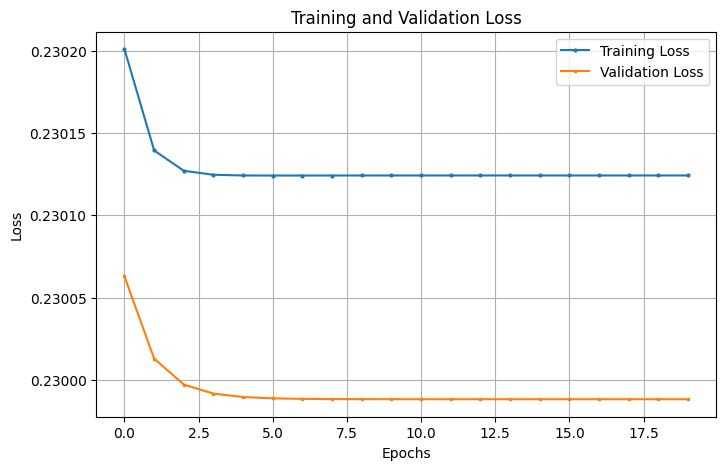

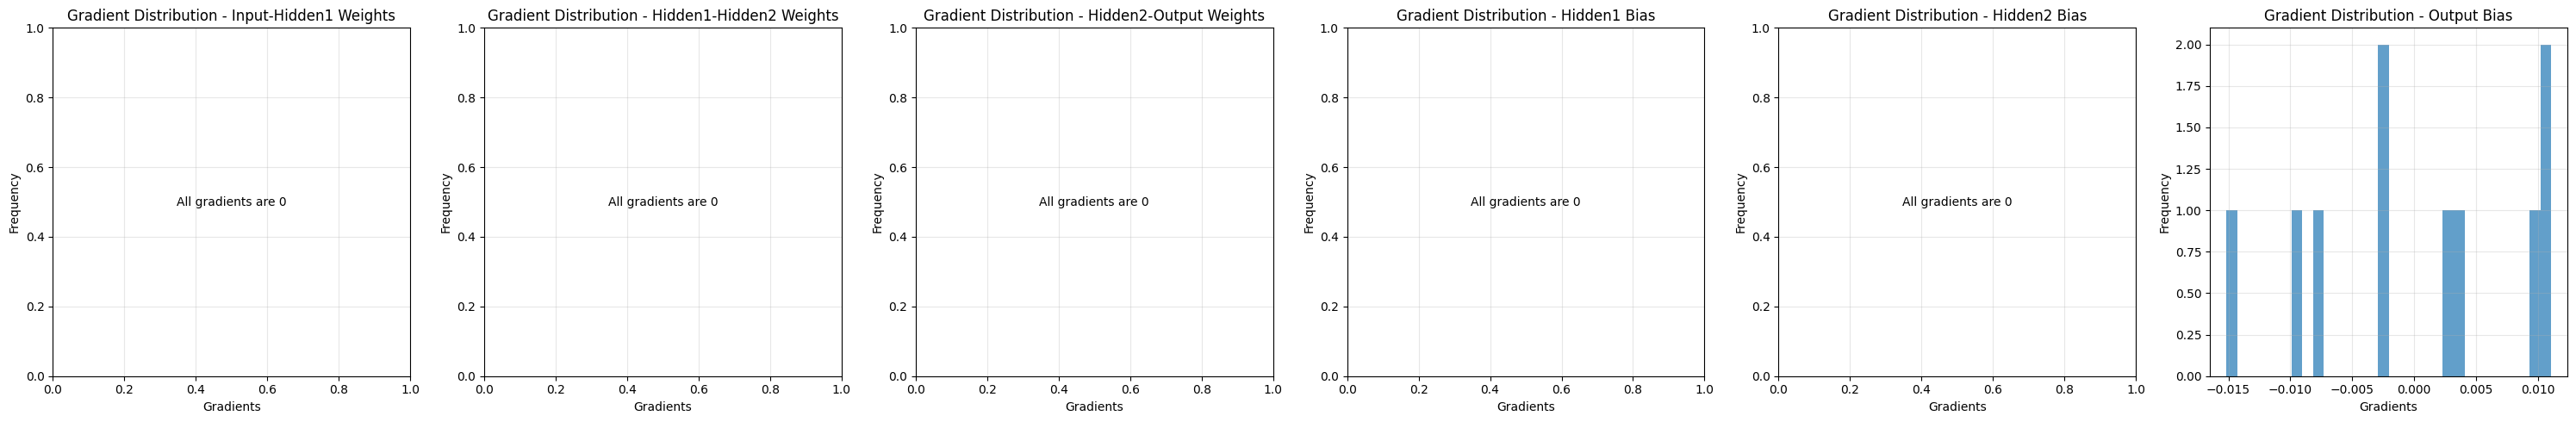

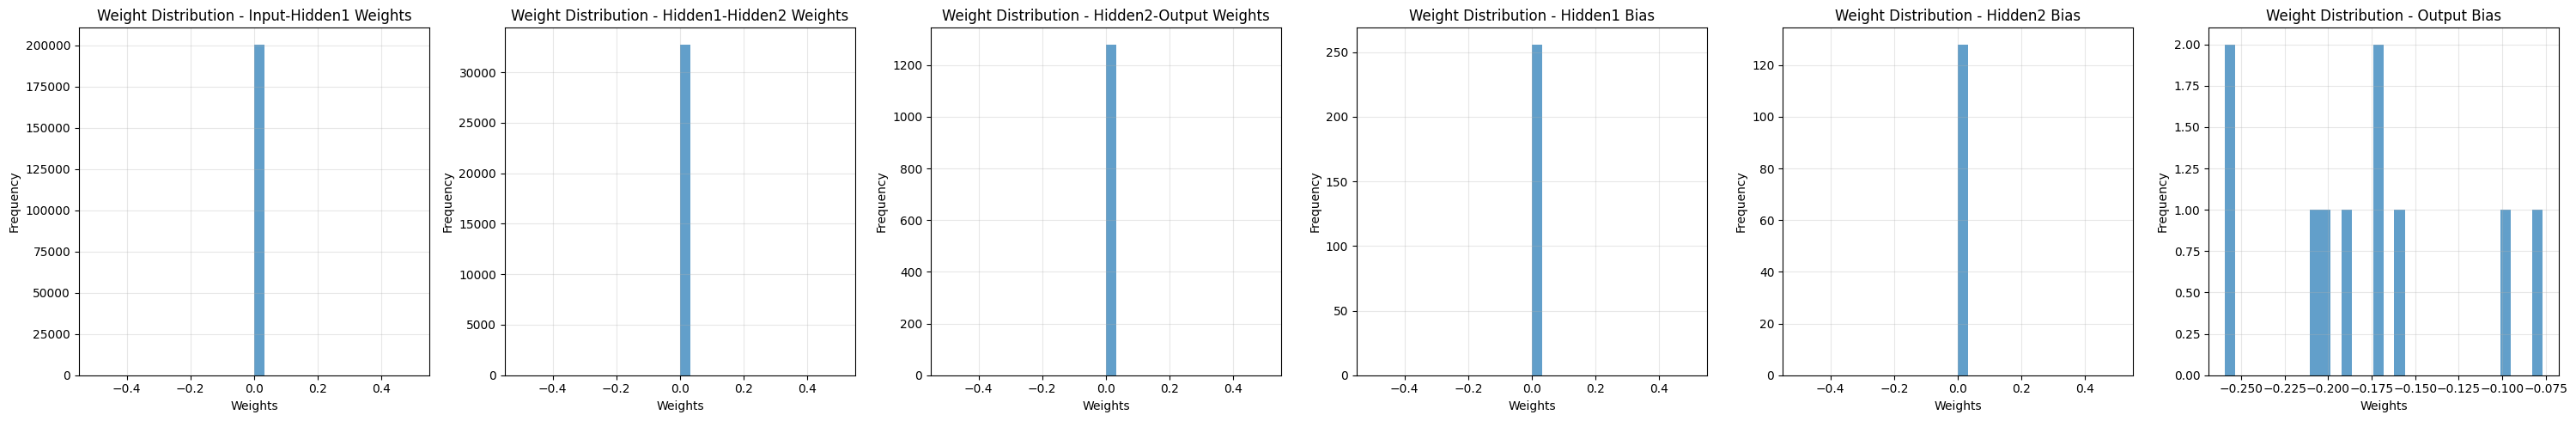

: 

In [15]:
plotter.plot_training_history(ffnn5)
plotter.plot_gradient_distributions(ffnn5)
plotter.plot_weight_distributions(ffnn5)